# Natural Language Processing

# Sentiment Analysiz and Sentiment Modeling

## About Dataset:

Dataset ini berisi percakapan antara pengguna dan psikolog berpengalaman yang berkaitan dengan topik kesehatan mental. Data ini dikumpulkan dengan hati-hati dan dianonimkan, sehingga dapat digunakan untuk mengembangkan model Natural Language Processing (NLP) yang berfokus pada pemberian saran dan panduan kesehatan mental. Dataset ini terdiri dari berbagai pertanyaan yang akan membantu melatih model NLP untuk memberikan saran yang tepat kepada pengguna sesuai dengan pertanyaan mereka.

Dataset ini berisi percakapan antara pengguna dan psikolog berpengalaman tentang topik kesehatan mental yang penting.

# import packages

In [ ]:
!pip install nltk
!pip install textblob
!pip install wordcloud

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("train.csv")
df.shape

(3512, 2)

In [ ]:
df.head()

,Context,Response
0,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today."
1,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone. Changing our feelings is like changing our thoughts - it's hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it's place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to ""snap out of it"" - which is also a thought that carries some self-criticism. Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the thoughts, you change how you respond to them. You learn skills that allow you to manage difficult thoughts and feelings differently so they don't have the same impact on you that they do right now. For some people, they actually DO begin to experience less hurtful thoughts once they learn how to manage the ones they have differently. Acceptance and Commitment Therapy may be a good choice for you. There is information online and even self-help books that you can use to teach you the skills that I mentioned. Because they are skills, they require practice, but many people have found great relief and an enriched life by learning them. As for suicidal thoughts, I am very glad to read that this has not happened to you. Still, you should watch out for this because it can be a sign of a worsening depression. If you begin to think about this, it is important to reach out to a support system right away. The National Suicide Prevention Lifeline is 1-800-273-8255. The text line is #741741. I hope some other colleagues will provide you more suggestions. Be well...Robin Landwehr, DBH, LPCC"
2,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How

In [ ]:
# random response
random_response = df["Response"][1:2]

# Melihat panjang text sebelum dilakukan preprocessing
print("before text preprocessing len: ", len(df["Response"][1]))

before text preprocessing len:  2082


In [ ]:
random_response

1    Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone. Changing our feelings is like changing our thoughts - it's hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it's place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to "snap out of it" - which is also a thought that carries some self-criticism. Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the thoug

# Text Preprocessing

In [ ]:
# Normalasisai dengan huruf kecil semua kata

df["Context"] = df["Context"].str.lower()
df["Response"] = df["Response"].str.lower()

In [ ]:
# Menghapus nomor atau angka

df["Context"] = df["Context"].str.replace('\d', '')
df["Response"] = df["Response"].str.replace('\d', '')

In [ ]:
# Menghapus Stopwords (a, an, and, as, at, but, by, for, if, is, it, on, of, or, s, that, their, the, then, these ...)

nltk.download('stopwords')
sw = stopwords.words('english')

df["Context"] = df["Context"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["Response"] = df["Response"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Melihat panjang text setelah dilakukan preprocessing

print("after text preprocessing len: ",len(df["Response"][1]))

after text preprocessing len:  1300


In [ ]:
# menghapus kata-kata yang jarang muncul

# Pada kali ini, mencoba menghapus kata kata yang hanya muncul <= 1
temp_Context = pd.Series(' '.join(df['Context']).split()).value_counts()
drops = temp_Context[temp_Context <= 1]
df['Context'] = df['Context'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

temp_Response = pd.Series(' '.join(df['Response']).split()).value_counts()
drops = temp_Response[temp_Response <= 1]
df['Response'] = df['Response'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [ ]:
# Tokenization

nltk.download('punkt')
df["Context"].apply(lambda x: TextBlob(x).words).head(1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [i, 'm, going, things, feelings, myself, barely, sleep, nothing, think, i, 'm, worthless, here, i, 've, never, tried, contemplated, suicide, i, 've, always, wanted, fix, issues, never, get, around, it, change, feeling, worthless, everyone]
Name: Context, dtype: object

In [ ]:
# Lemmatization

nltk.download('wordnet')
df["Context"] = df["Context"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["Response"] = df["Response"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Cek kembali panjang kalimat

print("after tokenizateion and lemmatization len: ",len(df["Response"][1]))

after tokenizateion and lemmatization len:  1198


# Text Visualization

In [ ]:
# Menghitung banyaknya kata yang muncul pada seluruh kalimat pada kolom "Context"

tf_Context = df["Context"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_Context.columns = ["words", "tf"]
tf_Context.sort_values("tf", ascending=False)

,words,tf
0,i'm,1603.00
76,feel,1315.00
75,like,1145.00
63,know,989.00
10,get,985.00
...,...,...
3751,"lying,",2.00
2712,fat.,2.00
2713,flaunt,2.00
3748,"name,",2.00


In [ ]:
# Menghitung banyaknya kata yang muncul pada seluruh kalimat pada kolom "Response"

tf_Response = df["Response"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_Response.columns = ["words", "tf"]
tf_Response.sort_values("tf", ascending=False)

,words,tf
11,may,2890.00
6,feel,2877.00
363,would,2343.00
157,help,2194.00
123,like,2155.00
...,...,...
11895,worksheet,2.00
11896,"separation""",2.00
11897,"""therapeutic",2.00
4273,patch.best,2.00


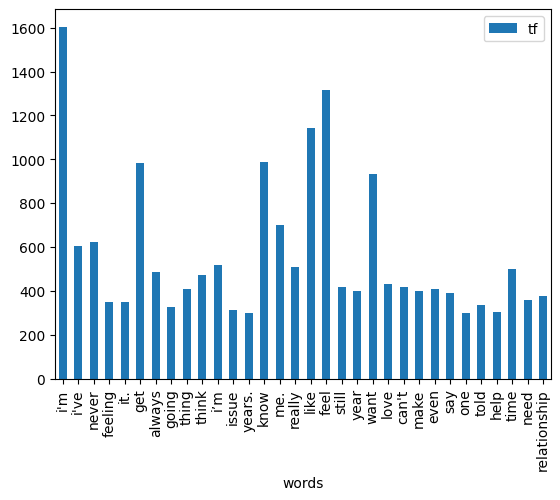

In [ ]:
# Barplot untuk Context

tf_Context[tf_Context["tf"] > 300].plot.bar(x="words", y="tf")
plt.show()

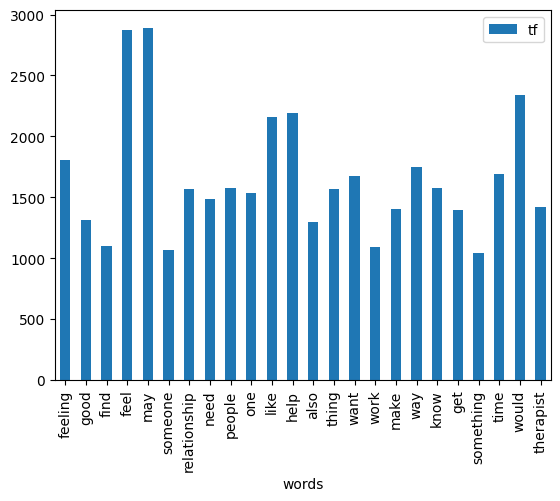

In [ ]:
# Barplot untuk Response

tf_Response[tf_Response["tf"] > 1000].plot.bar(x="words", y="tf")
plt.show()

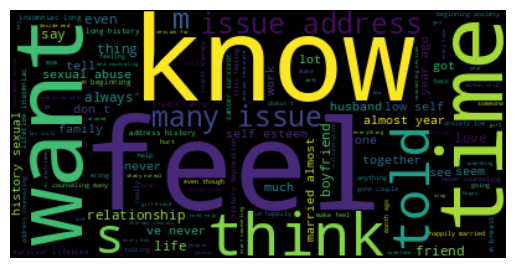

In [ ]:
# Wordcloud untuk Context

text_Context = " ".join(i for i in df.Context)

wordcloud = WordCloud().generate(text_Context)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

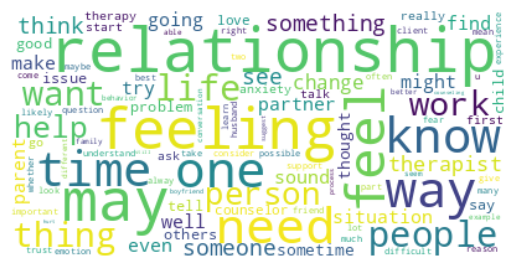

In [ ]:
# Wordcloud untuk Response

text_Response = " ".join(i for i in df.Response)

wordcloud_Response = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text_Response)
plt.figure()
plt.imshow(wordcloud_Response, interpolation="bilinear")
plt.axis("off")
plt.show()

# wordcloud.to_file("wordcloud.png") # kaydetmek istersek

# Sentiment Analysis

In [ ]:
sia = SentimentIntensityAnalyzer() #nltk library

In [ ]:
df["polarity_score_Context"] = df["Context"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_score_Context"]

0       0.86
1       0.86
2       0.86
3       0.86
4       0.86
        ... 
3507   -0.49
3508   -0.38
3509   -0.92
3510   -0.62
3511   -0.83
Name: polarity_score_Context, Length: 3512, dtype: float64

In [ ]:
df["polarity_score_Response"] = df["Response"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_score_Response"]

0       0.88
1       0.97
2       0.80
3       0.25
4       0.46
        ... 
3507   -0.80
3508   -0.78
3509    0.98
3510    0.87
3511   -0.20
Name: polarity_score_Response, Length: 3512, dtype: float64

Kode di atas bertujuan untuk menghitung skor polaritas sentimen dari teks dalam kolom "Context" dan "Response" dari DataFrame df menggunakan SentimentIntensityAnalyzer dari pustaka nltk. Skor polaritas sentimen ini memberikan indikasi apakah teks memiliki sentimen positif, negatif, atau netral.

# Feature Engineering

In [ ]:
df["sentiment_label_Context"] = df["Context"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")


In [ ]:
df["sentiment_label_Context"].value_counts()

sentiment_label_Context
neg    2325
pos    1187
Name: count, dtype: int64

In [ ]:
df["sentiment_label_Response"] = df["Response"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df.columns

Index(['Context', 'Response', 'polarity_score_Context', 'polarity_score_Response', 'sentiment_label_Context', 'sentiment_label_Response'], dtype='object')

In [ ]:
df[['polarity_score_Context', 'polarity_score_Response',
    'sentiment_label_Context', 'sentiment_label_Response']]

,polarity_score_Context,polarity_score_Response,sentiment_label_Context,sentiment_label_Response
0,0.86,0.88,pos,pos
1,0.86,0.97,pos,pos
2,0.86,0.80,pos,pos
3,0.86,0.25,pos,pos
4,0.86,0.46,pos,pos
...,...,...,...,...
3507,-0.49,-0.80,neg,neg
3508,-0.38,-0.78,neg,neg
3509,-0.92,0.98,neg,pos
3510,-0.62,0.87,neg,pos


In [ ]:
df["sentiment_label_Response"].value_counts()

sentiment_label_Response
pos    2887
neg     625
Name: count, dtype: int64

# LabelEncoder

In [ ]:
df["sentiment_label_Context"] = LabelEncoder().fit_transform(df["sentiment_label_Context"])
df["sentiment_label_Response"] = LabelEncoder().fit_transform(df["sentiment_label_Response"])

In [ ]:

y = df["sentiment_label_Response"] # target, dependent variable
X = df["Response"] # independent variable


# Count Vectors

Count Vectors, juga dikenal sebagai Bag of Words (BoW), adalah metode sederhana yang menghitung jumlah kemunculan setiap kata dalam sebuah dokumen. Setiap dokumen direpresentasikan sebagai vektor dengan panjang yang sama dengan ukuran kosa kata (jumlah kata unik dalam semua dokumen).

In [ ]:
# Count Vectors:

vectorizer = CountVectorizer()
X_countvector = vectorizer.fit_transform(X)

In [ ]:
first5_words = vectorizer.get_feature_names_out()[:5]

word_frequencies = X_countvector.toarray()

for i, word in enumerate(first5_words):
    print(f"{word}: {word_frequencies[:, i]}")

00: [0 0 0 ... 0 0 0]
02: [0 0 0 ... 0 0 0]
06: [0 0 0 ... 0 0 0]
080241270x: [0 0 0 ... 0 0 0]
09: [0 0 0 ... 0 0 0]


# TF-IDF

TF-IDF adalah teknik yang tidak hanya mempertimbangkan frekuensi kemunculan kata dalam dokumen (Term Frequency - TF) tetapi juga memperhitungkan seberapa sering kata tersebut muncul di seluruh dokumen dalam corpus (Inverse Document Frequency - IDF). Tujuannya adalah untuk mengurangi bobot kata-kata umum yang muncul di banyak dokumen dan meningkatkan bobot kata-kata yang lebih jarang muncul, tetapi mungkin lebih penting.

In [ ]:
# TF-IDF Vectors:

tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)
X_tf_idf_word

<3512x9895 sparse matrix of type '<class 'numpy.float64'>'
	with 241825 stored elements in Compressed Sparse Row format>

# Sentiment Modeling

              precision    recall  f1-score   support

           0       0.89      0.15      0.26       207
           1       0.84      1.00      0.91       952

    accuracy                           0.85      1159
   macro avg       0.87      0.58      0.59      1159
weighted avg       0.85      0.85      0.80      1159



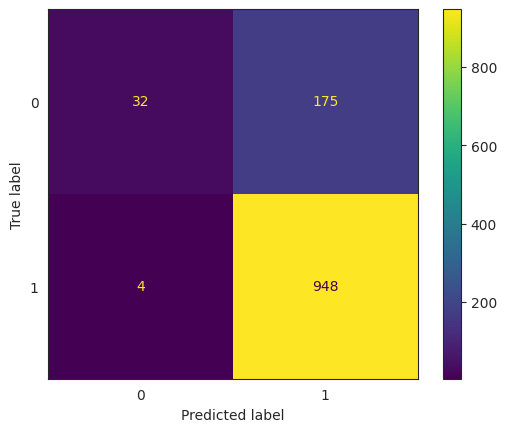

In [ ]:
# TF-IDF;

X_train, X_test, y_train, y_test = train_test_split(X_tf_idf_word , y, test_size=0.33, random_state=1)

lr = LogisticRegression()
sns.set_style('white')
pipe_lr = make_pipeline(lr)
pipe_lr.fit(X_train,y_train)
pred = pipe_lr.predict(X_test)
print(classification_report(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()
score_lr = accuracy_score(y_test,pred)


              precision    recall  f1-score   support

           0       0.90      0.74      0.81       207
           1       0.95      0.98      0.96       952

    accuracy                           0.94      1159
   macro avg       0.92      0.86      0.89      1159
weighted avg       0.94      0.94      0.94      1159



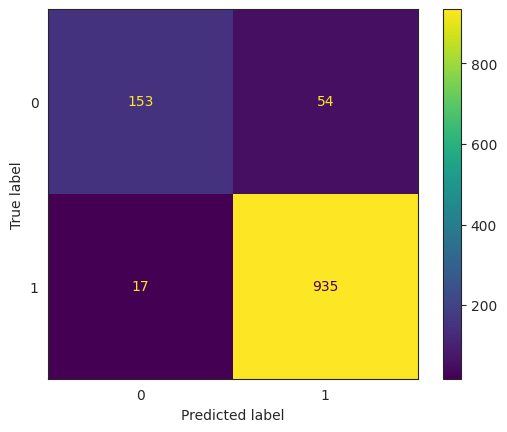

In [ ]:
# Count vector:

X_train, X_test, y_train, y_test = train_test_split(X_countvector , y, test_size=0.33, random_state=1)

lr = LogisticRegression()
sns.set_style('white')
pipe_lr = make_pipeline(lr)
pipe_lr.fit(X_train,y_train)
pred = pipe_lr.predict(X_test)
print(classification_report(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()
score_lr = accuracy_score(y_test,pred)
